In [4]:
import pandas as pd
import numpy as np
from numpy import cov
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

import ipywidgets as widgets
from ipywidgets import interact



def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

def plotter_corr(val):
    np.random.seed(42)
    if val < 0:
        coeff = -1
    else:
        coeff = 1

    x = np.linspace(0,10,101)
    noise = np.random.normal(0,np.abs(val),101)
    y = coeff * 2 * x + 1.5 + noise

    fig, axs = plt.subplots(1, 1, figsize=(8, 8))
    axs.scatter(x,y)
    confidence_ellipse(x,y,axs,edgecolor='red')
    plt.show()

    print(f"Correlation coefficient: {np.corrcoef(x,y)[0][1]}")
    print(f"Covariance X and Y: {cov(x,y)[0][1]}")
    
    
def playground_corr():
    pelemparan_slider = widgets.SelectionSlider(
        options=[-100, -50, -20, -10, -5, -1, -0.5, -0.2, -0.1, 
                 0 , 0.1, 0.2, 0.5, 1, 5, 10, 20, 50, 100],
        value=0,
        description='randomness:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True
    )

    print("Masukkan 'Randomness':")
    interact(plotter_corr, val=pelemparan_slider);
    
    
def plot_randomness():
    randomness=[-100, -75,-50, -20, -10, -5, -1, -0.5, -0.2, -0.1, 
            0 , 0.1, 0.2, 0.5, 1, 5, 10, 20, 50, 75, 100]
    corr_val = []
    cov_val = []
    np.random.seed(42)
    for ra in randomness:
        if ra < 0:
            coeff = -1
        else:
            coeff = 1

        x = np.linspace(0,10,101)
        noise = np.random.normal(0,np.abs(ra),101)
        y = coeff * 2 * x + 1.5 + noise
        corr_val.append(np.corrcoef(x,y)[0][1])
        cov_val.append(cov(x,y)[0][1])

    fig,axs = plt.subplots(1,2, figsize=(12,5))
    axs[0].plot(randomness,corr_val)
    axs[0].set_title("Correlation Values")
    axs[0].set_xlabel("Randomness")
    axs[1].plot(randomness,cov_val)
    axs[1].set_title("Covariance Values")
    axs[1].set_xlabel("Randomness")
    
    
def heatmap_correlation(corr):
    fig, ax = plt.subplots(figsize=(10,8))
    sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()
    
    
def stripplot_boxplot(df):
    g = sns.stripplot(data = df.melt(), 
                      x = 'variable', 
                      y = 'value', 
                      color = 'red')
    sns.boxplot(data = df.melt(),
                x = 'variable', 
                y = 'value', 
                color = 'yellow')

In [5]:
sumber = pd.read_csv("Downloads/insurance.csv")

In [6]:
sumber.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


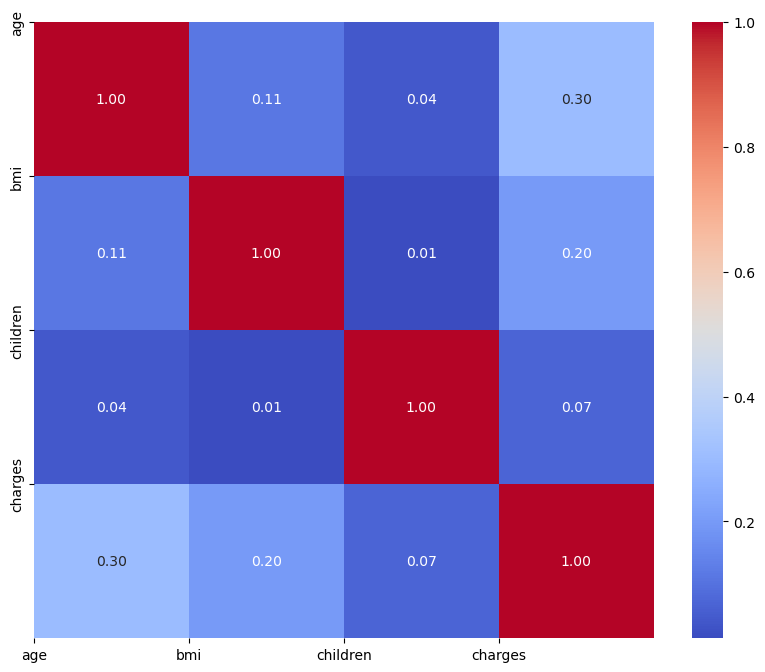

In [7]:
correlation = sumber.corr()
heatmap_correlation(correlation)

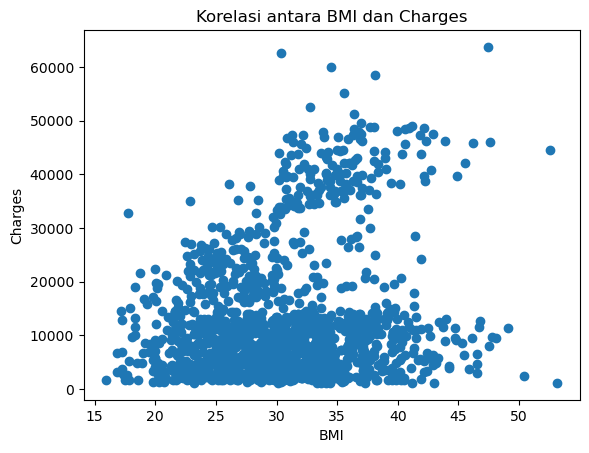

In [8]:
plt.scatter(sumber['bmi'], sumber['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Korelasi antara BMI dan Charges')
plt.show()

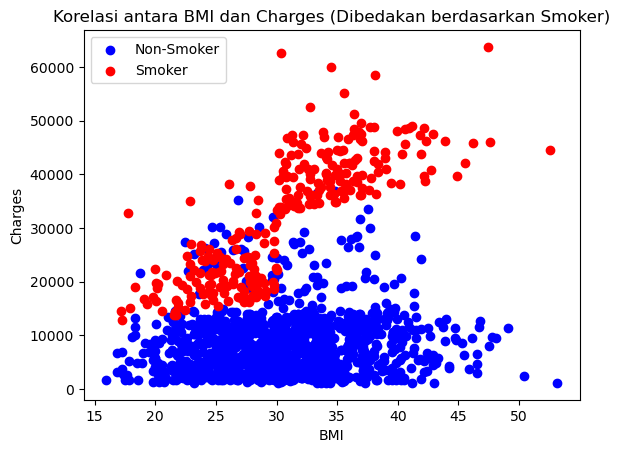

In [9]:
plt.scatter(sumber[sumber['smoker'] == 'no']['bmi'], sumber[sumber['smoker'] == 'no']['charges'], label='Non-Smoker', color='blue')
plt.scatter(sumber[sumber['smoker'] == 'yes']['bmi'], sumber[sumber['smoker'] == 'yes']['charges'], label='Smoker', color='red')

# Memberikan label sumbu dan judul plot
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Korelasi antara BMI dan Charges (Dibedakan berdasarkan Smoker)')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

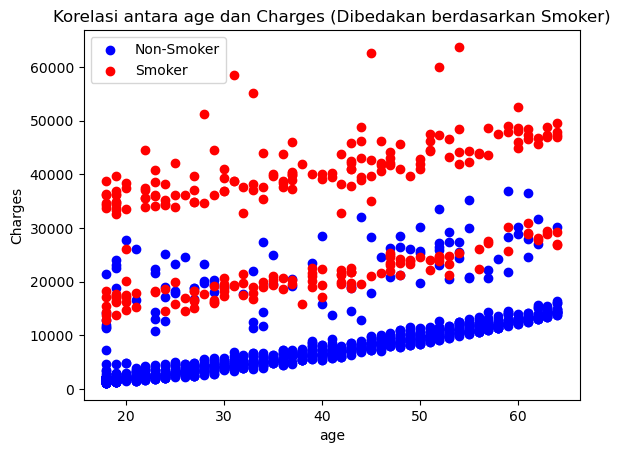

In [10]:
plt.scatter(sumber[sumber['smoker'] == 'no']['age'], sumber[sumber['smoker'] == 'no']['charges'], label='Non-Smoker', color='blue')
plt.scatter(sumber[sumber['smoker'] == 'yes']['age'], sumber[sumber['smoker'] == 'yes']['charges'], label='Smoker', color='red')

# Memberikan label sumbu dan judul plot
plt.xlabel('age')
plt.ylabel('Charges')
plt.title('Korelasi antara age dan Charges (Dibedakan berdasarkan Smoker)')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

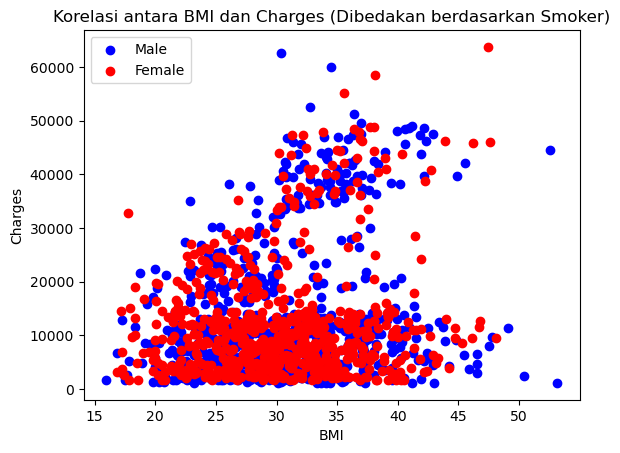

In [13]:
plt.scatter(sumber[sumber['sex'] == 'male']['bmi'], sumber[sumber['sex'] == 'male']['charges'], label='Male', color='blue')
plt.scatter(sumber[sumber['sex'] == 'female']['bmi'], sumber[sumber['sex'] == 'female']['charges'], label='Female', color='red')

# Memberikan label sumbu dan judul plot
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Korelasi antara BMI dan Charges (Dibedakan berdasarkan Smoker)')

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [66]:
import scipy.stats as stats

In [67]:
smoker = sumber[sumber['smoker'] == 'yes']['charges']
nonSmoker = sumber[sumber['smoker'] == 'no']['charges']

t_statistic, p_value = ttest_ind(smoker, nonSmoker, equal_var=False, alternative='greater')

print("t = %.2f, p-value = %.2f" % (t_statistic,p_value))


t = 32.75, p-value = 0.00


In [68]:
above_25 = sumber[sumber['bmi'] > 25]['charges']
below_equal_25 = sumber[sumber['bmi'] <= 25]['charges']

t_statistic, p_value = stats.ttest_ind(above_25, below_equal_25, equal_var=False, alternative='greater')

print("t = %.2f, p-value = %.2f" % (t_statistic,p_value))

t = 5.95, p-value = 0.00


In [69]:
male = sumber[sumber['sex'] == 'male']['charges']
female = sumber[sumber['sex'] == 'female']['charges']

t_statistic, p_value = stats.ttest_ind(male, female, equal_var=False, alternative='greater')

print("t = %.2f, p-value = %.2f" % (t_statistic,p_value))

t = 2.10, p-value = 0.02
